### Polynomial Regression Regularization using L1 and L2

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from utils import *

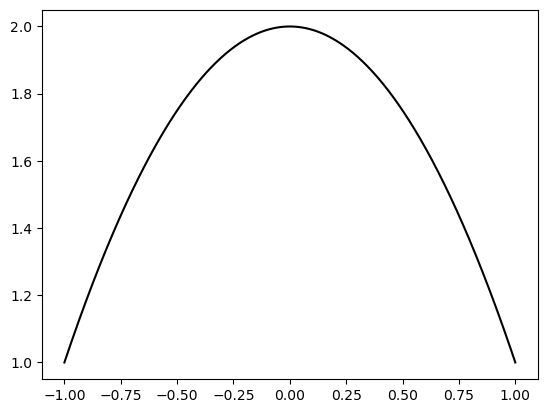

In [2]:
# our original polynomial is -x^2+1
coefs = [2,0,-1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-1,1,1000)
    # plt.ylim(0,3)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [4]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-1,1)
    y = polynomial(coefs, x) + random.gauss(0,0.1)
    X.append(x)
    Y.append(y)

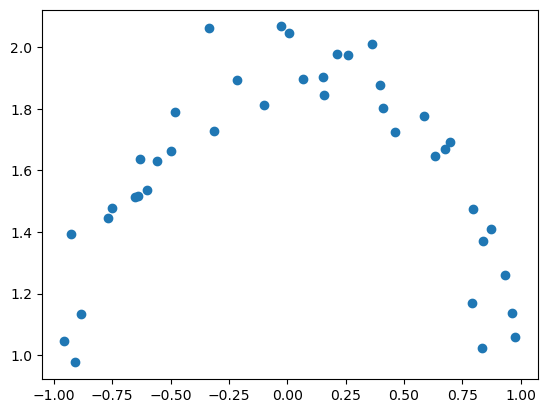

In [5]:
plt.scatter(X, Y)

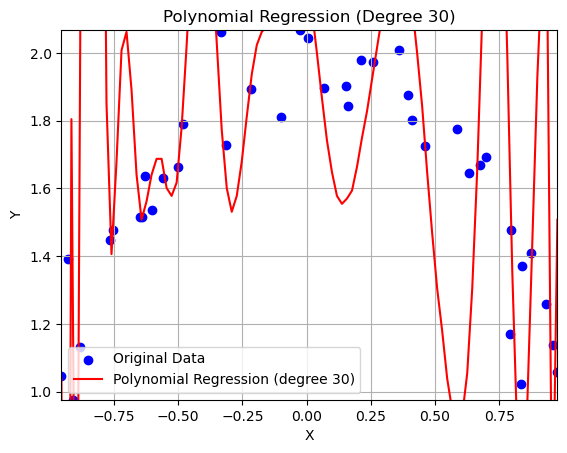

Polynomial Regression (Degree 30) Coeffecients: [-4.91492791e+13 -3.19989061e+00 -5.91264289e+01  1.21766208e+02
  3.36986726e+03 -5.14904699e+03 -9.32404332e+04  1.74240175e+05
  1.40600754e+06 -3.05891386e+06 -1.24892554e+07  3.05896943e+07
  6.91632327e+07 -1.92189919e+08 -2.44787482e+08  8.05651349e+08
  5.40870011e+08 -2.33018888e+09 -6.36040803e+08  4.71811120e+09
 -2.77572317e+07 -6.67442853e+09  1.39602094e+09  6.46229974e+09
 -2.33858901e+09 -4.07997231e+09  1.95550019e+09  1.51282183e+09
 -8.64145106e+08 -2.49807820e+08  1.60941883e+08]
Polynomial Regression (Degree 30) Intercept: 49149279067492.73


In [6]:
degree_used = 30

# Example usage with the existing data X and Y
weights_degree_used, intercepts_degree_used = train_and_plot_polynomial_regression(X, Y, 30)
print(f"Polynomial Regression (Degree {degree_used}) Coeffecients: {weights_degree_used}")
print(f"Polynomial Regression (Degree {degree_used}) Intercept: {intercepts_degree_used}")


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print("Shape of X_train:", np.shape(X_train))
print("Shape of X_test:", np.shape(X_test))
print("Shape of Y_train:", np.shape(Y_train))
print("Shape of Y_test:", np.shape(Y_test))


Shape of X_train: (32,)
Shape of X_test: (8,)
Shape of Y_train: (32,)
Shape of Y_test: (8,)


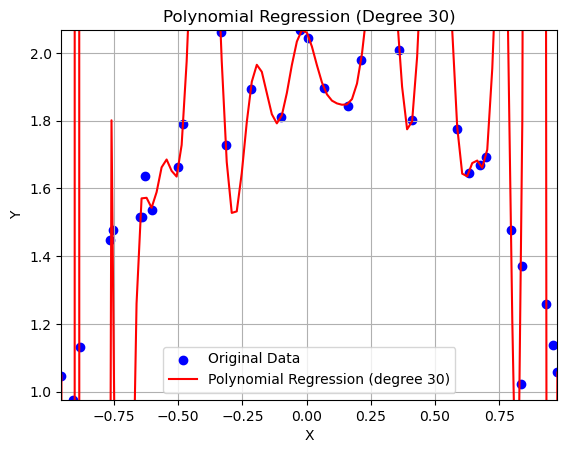

In [8]:
coefficients_and_intercepts = train_and_plot_polynomial_regression(X_train, Y_train, degree_used)

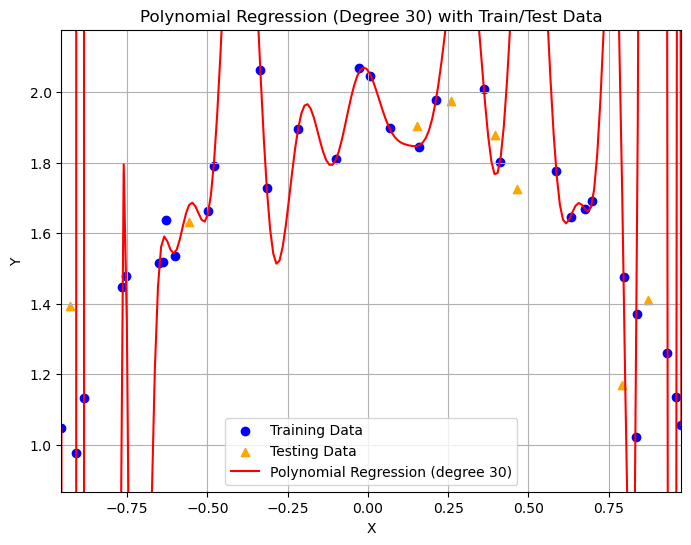

Square loss on the test set (degree 30): 70502.76897427478


In [9]:
square_loss = predict_and_evaluate(coefficients_and_intercepts, degree_used, X_train, Y_train, X_test, Y_test)
print(f"Square loss on the test set (degree {degree_used}): {square_loss}")

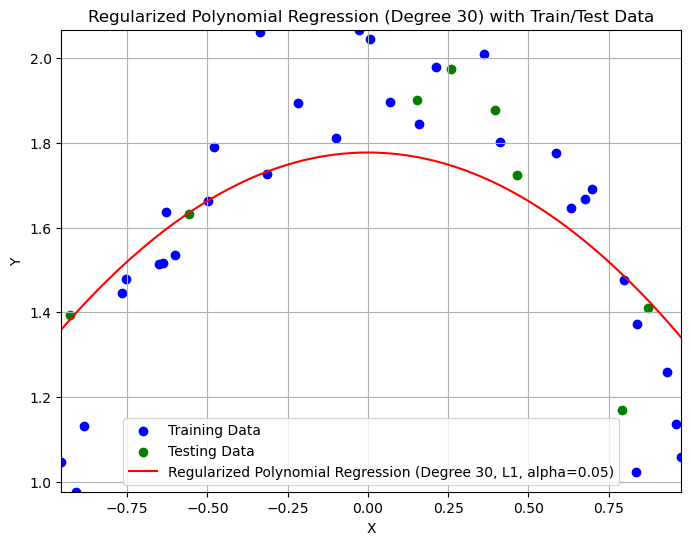

RMSE with L1 Regularization (degree 30, alpha=0.05): 0.16033116175127157


In [10]:
alpha_value = 0.05 # Example alpha value for regularization

# Train with L1 (Lasso) regularization
rmse_lasso = train_and_plot_regularized_polynomial_regression(X_train, Y_train, X_test, Y_test, degree_used, regularization_type='L1', alpha=alpha_value)
print(f"RMSE with L1 Regularization (degree {degree_used}, alpha={alpha_value:.2f}): {rmse_lasso}")

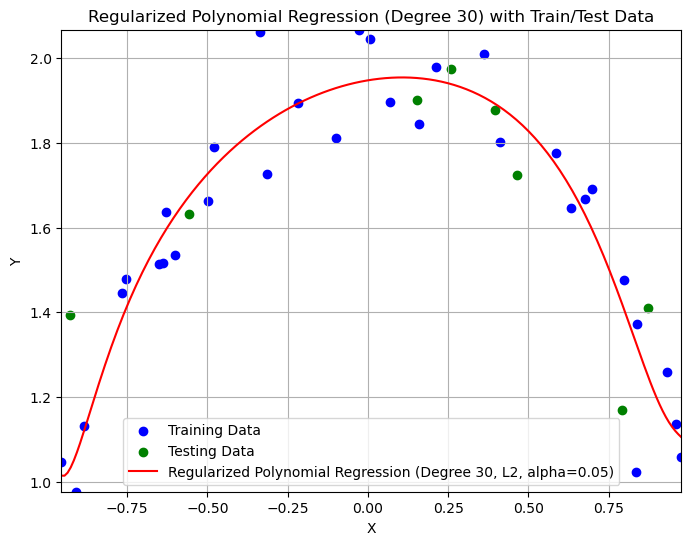

In [11]:
alpha_value = 0.05 #Example alpha value for regularization

# Train with L2 (Ridge) regularization
rmse_ridge = train_and_plot_regularized_polynomial_regression(X_train, Y_train, X_test, Y_test, degree_used, regularization_type='L2', alpha=alpha_value)